In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# reading the dataset and checking some rows
df = pd.read_csv('./train.csv')
X_test = pd.read_csv("./test.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# checking the shape of the dataset
df.shape

(42000, 785)

In [4]:
# creating x and y dataframes
df_y = df['label'] 
df_X = df.drop('label', axis=1)

1


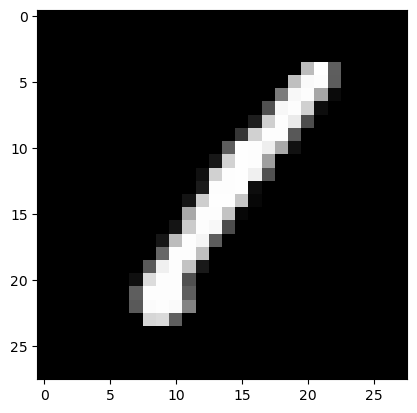

0


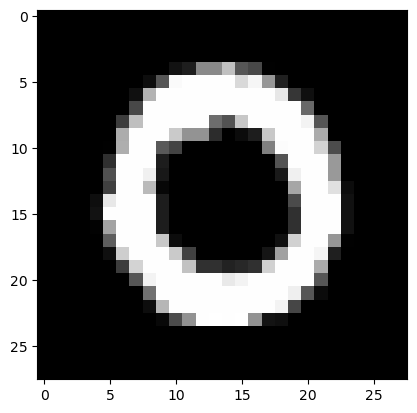

1


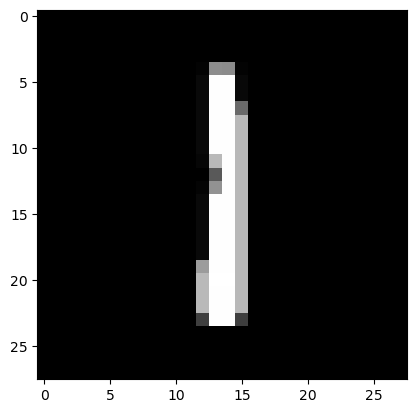

4


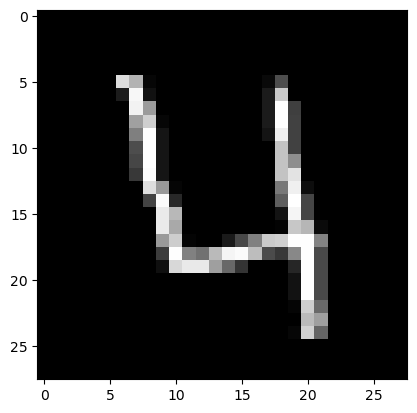

0


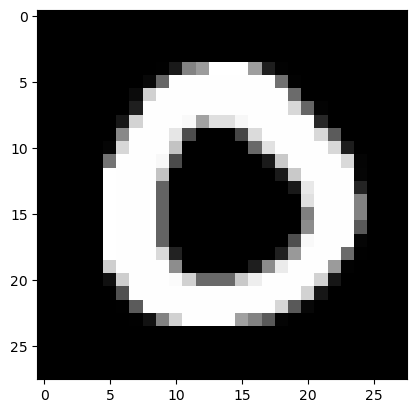

In [8]:
# checking some images and their labels
for i in range(5):
    img = df_X.iloc[i].values.reshape(28,28)
    print(df_y.iloc[i])
    plt.imshow(img, cmap='gray')
    plt.show()

In [9]:
# checking the distribution between output categories
df_y.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [15]:
# creating multi layer perceptron model
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(df_X.shape[-1],)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', metrics=['accuracy'], loss= 'sparse_categorical_crossentropy')

In [19]:
X_train, X_val, y_train, y_val = train_test_split(df_X,df_y, train_size=0.9,random_state=42)

In [20]:
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/5
591/591 [==============================] - 1s 1ms/step - loss: 1.6519 - accuracy: 0.8446 - val_loss: 0.4457 - val_accuracy: 0.9074
Epoch 2/5
591/591 [==============================] - 1s 1ms/step - loss: 0.2950 - accuracy: 0.9287 - val_loss: 0.3280 - val_accuracy: 0.9195
Epoch 3/5
591/591 [==============================] - 1s 1ms/step - loss: 0.1906 - accuracy: 0.9480 - val_loss: 0.2597 - val_accuracy: 0.9336
Epoch 4/5
591/591 [==============================] - 1s 1ms/step - loss: 0.1468 - accuracy: 0.9584 - val_loss: 0.2146 - val_accuracy: 0.9464
Epoch 5/5
591/591 [==============================] - 1s 1ms/step - loss: 0.1224 - accuracy: 0.9641 - val_loss: 0.1989 - val_accuracy: 0.9550


In [22]:
predictions = model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 0s 377us/step


2


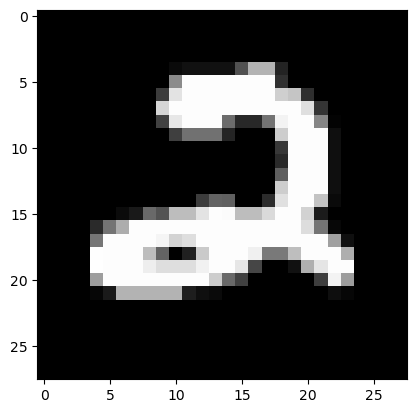

0


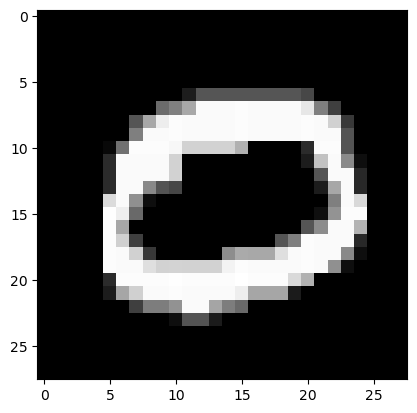

9


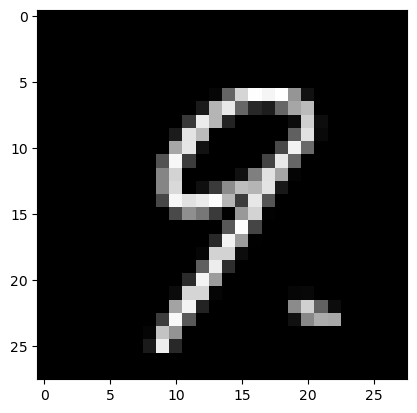

9


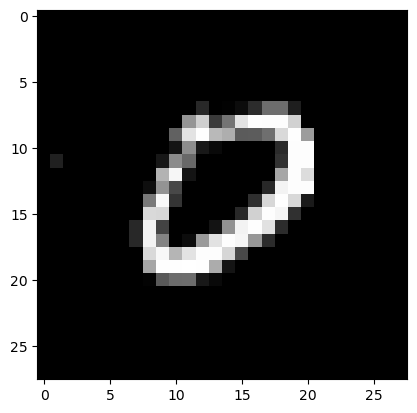

3


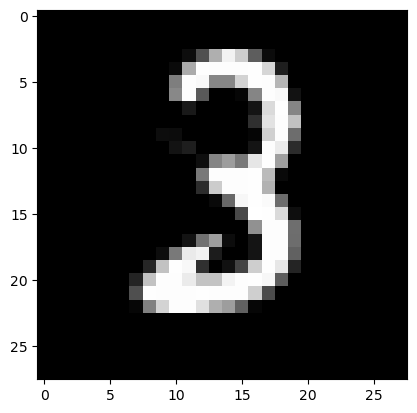

In [24]:
for i in range(5):
    print(predictions[i])
    img = X_test.iloc[i].values.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.show()